# Exercise: Data Visualization with Netflix Dataset
---

- **Dataset**: Netflix Movies and TV Shows
- **Sumber**: https://www.kaggle.com/datasets/shivamb/netflix-shows
- **Konten:** title, type, release_year, country, rating, duration, listed_in, date_added, director, dll.
- **Tujuan**: Memahami tren, persebaran konten, dan pola perilaku rilis konten Netflix secara visual.

Tujuan Latihan:
- Meningkatkan kemampuan membaca dan menginterpretasikan visualisasi.
- Meningkatkan keterampilan dalam memilih dan membuat visualisasi sesuai data dan konteks.
- Melatih penyampaian insight secara naratif dan eksploratif.

## Bagian 1 - Setup

- Import library (pandas, matplotlib, seaborn)
- Load dan tampilkan beberapa data
- Parsing tanggal (date_added) → datetime
- Tambahkan kolom year_added dan month_added dari date_added

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv("netflix_titles.csv")
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['duration_mins'] = df['duration'].str.extract(r'(\d+)').astype(float)
df.loc[df['type'] == 'TV Show', 'duration_mins'] = None

## Bagian 2 - Interpretasi dengan Pertanyaan

### Soal 2.1 Histogram Rilis Konten per Tahun

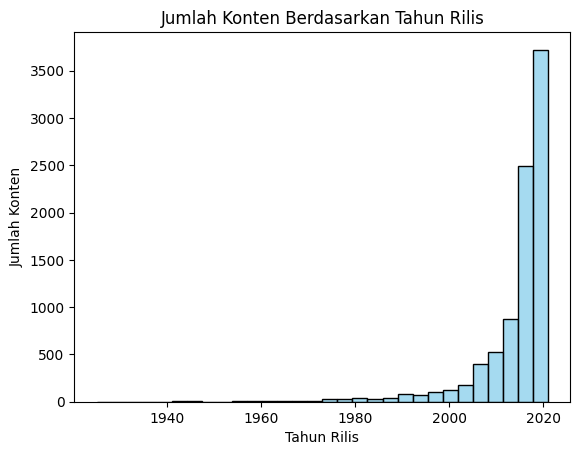

In [3]:
sns.histplot(df['release_year'].dropna(), bins=30, kde=False, color='skyblue')
plt.title("Jumlah Konten Berdasarkan Tahun Rilis")
plt.xlabel("Tahun Rilis")
plt.ylabel("Jumlah Konten")
plt.show()

Pertanyaan:
- Tahun berapa konten terbanyak dirilis?
- Apakah ada tren penurunan atau kenaikan?

Insight Anda: ...

### Soal 2.2 Countplot Negara Asal Konten

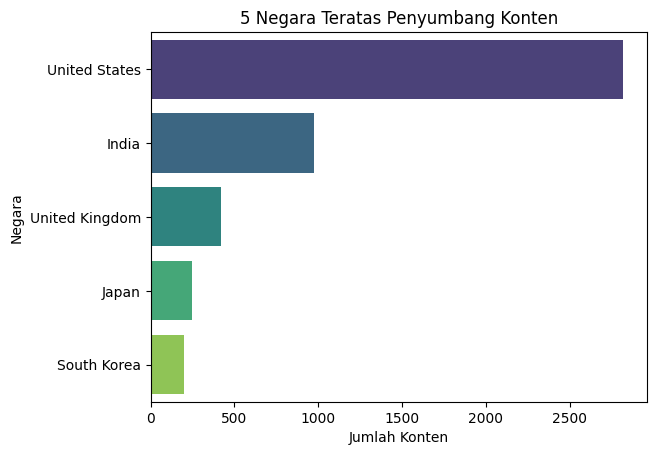

In [5]:
top_countries = df['country'].value_counts().head(5)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis', hue=top_countries.index)
plt.title("5 Negara Teratas Penyumbang Konten")
plt.xlabel("Jumlah Konten")
plt.ylabel("Negara")
plt.show()

Pertanyaan:
- Negara mana yang mendominasi?
- Apakah negara tersebut berkaitan dengan bahasa utama Netflix?

Insight Anda: ...

## Bagian 3 - Interpretasi Bebas (Tanpa Pertanyaan)

### Soal 3.1 Tren Konten Ditambahkan ke Netflix (Line Plot)

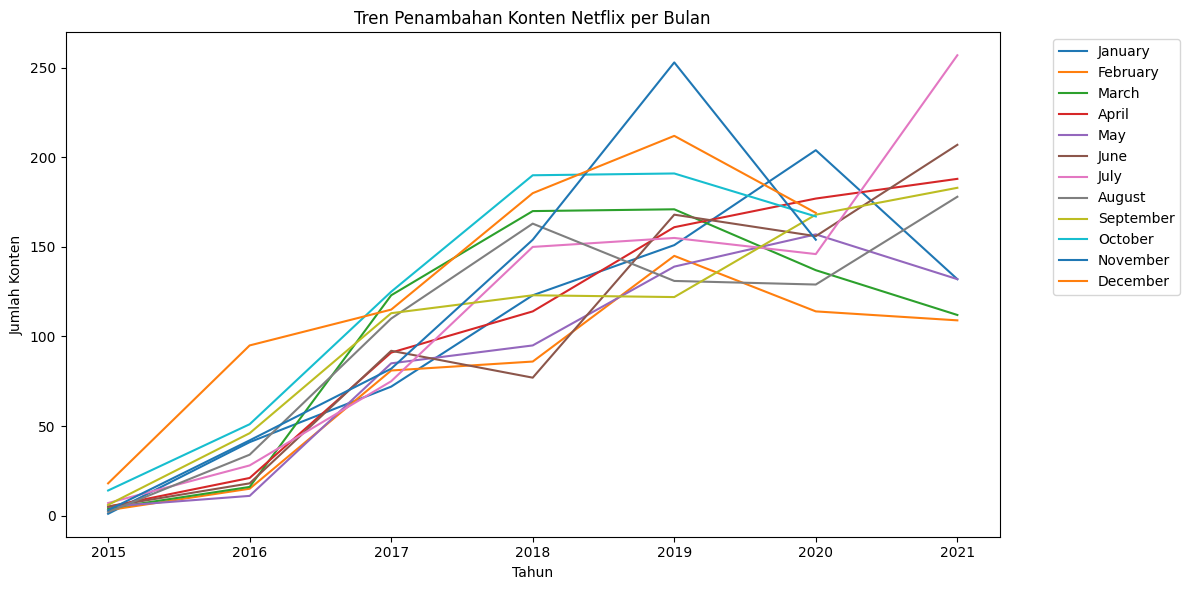

In [7]:
plt.figure(figsize=(12, 6))

monthly_added = df[df['year_added'] >= 2015].groupby(['year_added', 'month_added']).size().reset_index(name='count')
monthly_added['month_number'] = pd.to_datetime(monthly_added['month_added'], format='%B').dt.month
monthly_added = monthly_added.sort_values(by=['year_added', 'month_number'])

sns.lineplot(data=monthly_added, x='year_added', y='count', hue='month_added', palette='tab10')
plt.title("Tren Penambahan Konten Netflix per Bulan")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Konten")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Tuliskan insight yang bisa Anda simpulkan dari grafik ini.

## Bagian 4 - Buat Visualisasimu Sendiri

### Soal 4.1 Genre Terpopuler
**"Genre apa yang paling sering muncul di katalog Netflix?"**

Petunjuk:
- Gunakan kolom `listed_in`, pisahkan koma.
- Ambil top 10 genre lalu visualisasikan.

### Soal 4.2 Perbandingan Movie vs TV Show per Tahun
"Apakah Movie lebih banyak dirilis dibanding TV Show selama 10 tahun terakhir?"\
**Hint**: gunakan `release_year`, group by `type`.

### Soal 4.3: Pola Musiman Penambahan Konten
"Apakah ada bulan tertentu dengan konten terbanyak?"\
Gunakan heatmap: month_added vs year_added

## Added Challenge
Buat 1 visualisasi bebas yang menurutmu memberikan insight menarik dari data ini.